# Parte 2 - Experimentção

> Autor: Jonatas Travessa Souza de Barros - 1935310001

> Autor: Fabrizio Honda - 1715280006

## Importação das bibliotecas

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import random
import os

## Leitura do arquivo data0.txt com numpy

In [2]:
data0 = np.fromfile('../dados/data0.txt')
print(data0)

[-0.00149369 -0.03581784  0.         ...  1.02021556  0.86533059
  1.        ]


### Vendo o formato inicial do array

In [3]:
data0.shape

(1800,)

#### Sendo 1800 valores, significa que há 600 exemplos, visto que cada exemplo é representado por (x1, x2, yd). Logo, vamos transformar o array para representar os exemplos.

In [4]:
data0 = data0.reshape(600, 3)
print(data0)

[[-0.00149369 -0.03581784  0.        ]
 [ 0.01234945  0.10249524  0.        ]
 [ 0.13954598  0.05607083  0.        ]
 ...
 [ 0.95751872  1.0035204   1.        ]
 [ 0.97981588  1.00949493  1.        ]
 [ 1.02021556  0.86533059  1.        ]]


## Algoritmo de treinamento do Perceptron

#### A implementação do algoritmo de treinamento do Perceptron usado para resolver a parte 1 está na pasta src cujo aqruivo python foi chamado de Peceptron_general.py. Sendo, portanto, o mesmo algoritmo usado na parte 1.

In [5]:
import sys
sys.path.append('../')
from src.Perceptron_general import Perceptron_general

## Execução das configurações


### Cada configuração é executada 100 vezes

In [6]:
executions_number = 100 

### Configuração 1.
    Valor da taxa de aprendizado: 0,4
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-100, +100).

#### Inicialização do Perceptron

In [7]:
theta = 0.0
n = 0.4
bias = -1.0
perceptron = Perceptron_general(theta, n, bias)

#### Execuções

In [10]:
adjusts_array = np.empty(executions_number, dtype=int)
epochs_array = np.empty(executions_number, dtype=int)

i = 1
while (i <= executions_number):
    print("")
    print("Iteração número ", i)
    print("")
    
    weights = perceptron.inittial_weights(-100.0, 100.0)
    perceptron.fitParte2(data0)
    adjusts_array[i - 1] = perceptron.getWeightsAdjusts()
    epochs_array[i - 1] = perceptron.getEpochs()
    print("Quantidade de ajustes: ", adjusts_array[i - 1])
    print("Quantidade de épocas: ", epochs_array[i - 1])
    
    #Garantir que na última interação teremos o vetor de pesos para posterior plotagem do gráfico
    if (i < 100):
        #Função que possibila reutilizar a classe sem precisar instaciar um novo objeto
        perceptron.reset()
    
    i+=1

config1_epochs_mean = np.round(np.mean(epochs_array), 4)
config1_epochs_sd = np.round(np.std(epochs_array), 4)
config1_adjusts_mean = np.round(np.mean(adjusts_array), 4)
config1_adjusts_sd = np.round(np.std(adjusts_array), 4)

print("")
print("Épocas. Média: ", config1_epochs_mean, " Desvio Padrão: ", config1_epochs_sd)
print("Ajustes. Média: ", config1_adjusts_mean, " Desvio Padrão: ", config1_adjusts_sd)


Iteração número  1

Quantidade de ajustes:  314
Quantidade de épocas:  17

Iteração número  2

Quantidade de ajustes:  273
Quantidade de épocas:  30

Iteração número  3

Quantidade de ajustes:  460
Quantidade de épocas:  8

Iteração número  4

Quantidade de ajustes:  357
Quantidade de épocas:  9

Iteração número  5

Quantidade de ajustes:  122
Quantidade de épocas:  18

Iteração número  6

Quantidade de ajustes:  276
Quantidade de épocas:  11

Iteração número  7

Quantidade de ajustes:  46
Quantidade de épocas:  4

Iteração número  8

Quantidade de ajustes:  136
Quantidade de épocas:  4

Iteração número  9

Quantidade de ajustes:  376
Quantidade de épocas:  25

Iteração número  10

Quantidade de ajustes:  282
Quantidade de épocas:  7

Iteração número  11

Quantidade de ajustes:  239
Quantidade de épocas:  23

Iteração número  12

Quantidade de ajustes:  552
Quantidade de épocas:  21

Iteração número  13

Quantidade de ajustes:  167
Quantidade de épocas:  19

Iteração número  14

Quant

#### O seguinte vetor de pesos, obtido na última execução da configuração 1, é capaz de prover a saída correta para todos os exemplos presentes em data0.txt.

In [11]:
weights = perceptron.getWeights()
weights

array([20.9346, -8.4412, 88.0863])

#### Cáculo da reta solução a partir do último vetor de pesos encontrado

In [16]:
#Equação da reta: x2 = (weights[0]/weights[2]) - (weights[1]/weights[2])*x1

#Encontrando dois pontos para obter a reta

#para x1 igual a 1000:
x2_1 = weights[0]/weights[2] - (weights[1]/weights[2])*(1.4)

#para x1 igual a -1000:
x2_2 = weights[0]/weights[2] - (weights[1]/weights[2])*(-0.4)

#### Gráfico do conjunto de dados e a reta que separa as classes

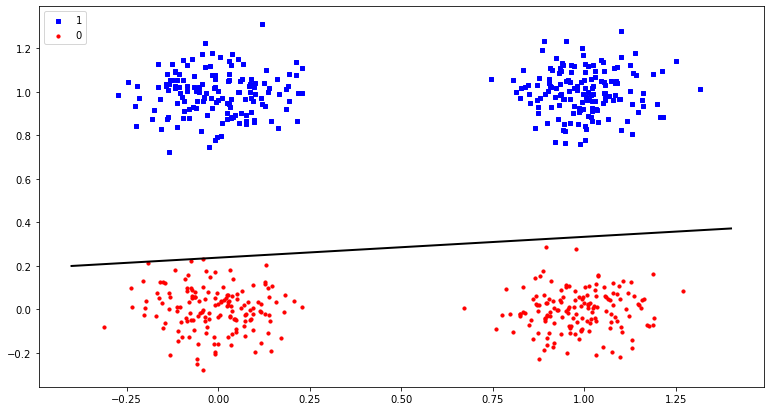

In [18]:
plt.figure(figsize=(13, 7))
x_b = []
y_b = []
x_r = []
y_r = []
for example in data0:
    if example[2] == 1.0:
        x_b.append(example[0])
        y_b.append(example[1])
    if example[2] == 0.0:
        x_r.append(example[0])
        y_r.append(example[1])
        
size = 10
plt.scatter(x_b, y_b, s=size, color='b', marker="s", label='1')
plt.scatter(x_r, y_r, s=size, color='r', marker="o", label='0')
plt.legend(loc='upper left')
plt.plot([1.4, -0.4],[x2_1, x2_2], color='black', linewidth=2)
plt.show()

### Configuração 2.
    Valor da taxa de aprendizado: 0,4
    Intervalo a ser utilizado para a distribuição uniforme do valor dos pesos: wi ∼ U(-1, +1).

In [19]:
#TODO: Configuração 2 em diante